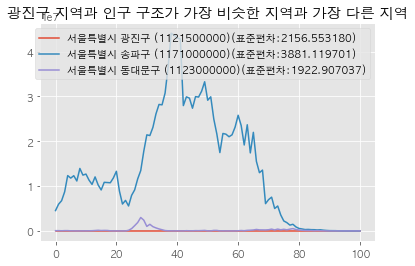

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('/Users/hadongjun/Desktop/population.csv','r',encoding='cp949')
data=csv.reader(f) 
next(data) 
next(data) 
area_name=[]
pnum=[]
result=np.array([])
min_area=""
max_area=""
data_all=[]

data=list(data)
for row in data:
    if "서울특별시 광진구" in row[0]:
        stdname=row[0] #광진구 
        for r in row[3:]:
            pnum.append(int(r.replace(',','')))
        standard=np.array(pnum)
    else:
        area_name.append(row[0]) #다른 구 이름 저장
pnum.clear()

for row in data:
    if stdname not in row[0]: 
        for r in row[3:]:
            pnum.append(int(r.replace(',','')))
        area=np.array(pnum) #다른지역
        data_all.append(area)
        temp=np.sum((standard-area)**2) 
        result=np.append(result,temp)
    pnum.clear()
max=result[0]
min=result[0]
for i in range(1,len(result)):
    if max<result[i]:
        max=result[i]
        max_area=area_name[i]
        max_index=i
    if min>result[i]:
        min=result[i]
        min_area=area_name[i]
        min_index=i
f.close()   
plt.style.use('ggplot')
plt.rc('font',family='AppleGothic')
plt.title('광진구 지역과 인구 구조가 가장 비슷한 지역과 가장 다른 지역')
plt.plot([0]*101,label="{0:s}(표준편차:{1:f})".format(stdname,np.std(standard)))
plt.plot(((standard-data_all)**2)[max_index],label="{0:s}(표준편차:{1:f})".format(max_area,np.std(data_all[max_index]))) #가장 다른 지역
plt.plot(((standard-data_all)**2)[min_index],label="{0:s}(표준편차:{1:f})".format(min_area,np.std(data_all[min_index]))) #가장 비슷한 지역
plt.legend()
plt.show()